<img src="https://upload-images.jianshu.io/upload_images/12014150-61678887c8186205.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240" alt="image.png" style="zoom:50%;" />

## 推导变量导数表达式

由原始定义
$$
\begin{aligned}
&h=X W_{1}+b_{1} \\
&h_{\text {sigmoid }}=\operatorname{sigmoid}(h) \\
&Y_{\text {pred }}=h_{\text {sigmoid }} W_{2}+b_{2} \\
&f=\left\|Y-Y_{\text {pred }}\right\|_{F}^{2}
\end{aligned}
$$

得

$$
\frac{\partial f}{\partial Y_{pred}} = 2(Y_{pred} - Y)
$$

$$
\frac{\partial f}{\partial h_{sigmoid}} = \frac{\partial f}{\partial Y_{pred}}W_2^T
$$

$$
\frac{\partial f}{\partial W_2} = h_{sigmoid}^T \frac{\partial f}{\partial Y_{pred}}, \ \frac{\partial f}{\partial b_2} = \frac{\partial f}{\partial Y_{pred}}
$$

$$
\frac{\partial f}{\partial h} = \frac{\partial f}{\partial h_{sigmoid}} \odot sigmoid'(h), \ sigmoid'(x) = sigmoid(x)(1-sigmoid(x))
$$

$$
\frac{\partial f}{\partial W_1} = X^T \frac{\partial f}{\partial h}, \ \frac{\partial f}{\partial b_1} = \frac{\partial f}{\partial h}
$$

综上

- $\frac{\partial f}{\partial W_1} = (2X^T(Y_{pred}-Y)W_2^T) \odot (sigmoid(h)(1-sigmoid(h)))$
- $\frac{\partial f}{\partial b_1} = (2(Y_{pred}-Y)W_2^T) \odot (sigmoid(h)(1-sigmoid(h)))$
- $\frac{\partial f}{\partial W_2} = 2h_{sigmoid}^T(Y_{pred}-Y)$
- $\frac{\partial f}{\partial b_2} = 2(Y_{pred} - Y)$


In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

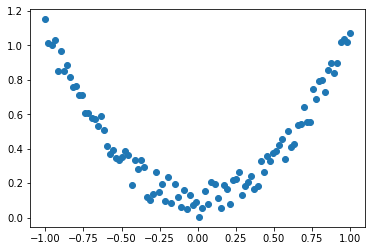

In [2]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_feature, n_hidden, bias=True),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden, n_output, bias=True)
        )

        # self.hidden = torch.nn.Linear(n_feature, n_hidden, bias=True)
        # self.predict = torch.nn.Linear(n_hidden, n_output, bias=True)
 
    def forward(self, x):
        # x = F.sigmoid(self.hidden(x))
        # x = self.predict(x)
        x = self.net(x)
        return x

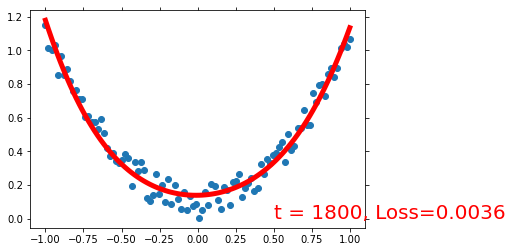

In [4]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(2000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 200 == 0:
        # plot and show learning process
        plt.cla()
        display.clear_output()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()